In [2]:
#for data accessing and manipulating. 
import pandas as pd
import numpy as np
from scipy.stats import randint
from keras.layers import BatchNormalization
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Modelling
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from tensorflow.keras.layers import Dense, Dropout


In [3]:
#Loading Data
bankData = pd.read_csv(r"C:\Users\zuhai\Downloads\churn_data_bank\bank_data_train.csv")
print(f"Number of samples in data : {len(bankData)}")
print(f"Number of features in data : {bankData.shape[1]}")
#Keeping a copy of original data set in case of data loss. 
copyOfBankData = bankData.copy()

Number of samples in data : 355190
Number of features in data : 116


In [4]:
#Basic info about our bank data.
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355190 entries, 0 to 355189
Columns: 116 entries, ID to TARGET
dtypes: float64(94), int64(9), object(13)
memory usage: 314.3+ MB


In [5]:
#Checking the types of our data.
bankData.dtypes

ID                               int64
CR_PROD_CNT_IL                   int64
AMOUNT_RUB_CLO_PRC             float64
PRC_ACCEPTS_A_EMAIL_LINK       float64
APP_REGISTR_RGN_CODE           float64
PRC_ACCEPTS_A_POS              float64
PRC_ACCEPTS_A_TK               float64
TURNOVER_DYNAMIC_IL_1M         float64
CNT_TRAN_AUT_TENDENCY1M        float64
SUM_TRAN_AUT_TENDENCY1M        float64
AMOUNT_RUB_SUP_PRC             float64
PRC_ACCEPTS_A_AMOBILE          float64
SUM_TRAN_AUT_TENDENCY3M        float64
CLNT_TRUST_RELATION             object
PRC_ACCEPTS_TK                 float64
PRC_ACCEPTS_A_MTP              float64
REST_DYNAMIC_FDEP_1M           float64
CNT_TRAN_AUT_TENDENCY3M        float64
CNT_ACCEPTS_TK                 float64
APP_MARITAL_STATUS              object
REST_DYNAMIC_SAVE_3M           float64
CR_PROD_CNT_VCU                  int64
REST_AVG_CUR                   float64
CNT_TRAN_MED_TENDENCY1M        float64
APP_KIND_OF_PROP_HABITATION     object
CLNT_JOB_POSITION_TYPE   

* customer id is unique to everyone and is not relevant feature to train our model. so let us drop that feature.

In [6]:
bankData.drop(columns=['ID'], inplace=True)

In [7]:
#Basic statistics on numerical data
bankData.describe().T

,count,mean,std,min,25%,50%,75%,max
CR_PROD_CNT_IL,355190.0,0.105225,0.431372,0.000000e+00,0.000000,0.000000,0.000000,1.100000e+01
AMOUNT_RUB_CLO_PRC,316867.0,0.044045,0.108449,0.000000e+00,0.000000,0.000000,0.036608,1.000000e+00
PRC_ACCEPTS_A_EMAIL_LINK,155163.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
APP_REGISTR_RGN_CODE,60550.0,50.947498,21.777855,0.000000e+00,33.000000,54.000000,72.000000,8.900000e+01
PRC_ACCEPTS_A_POS,155163.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
PRC_ACCEPTS_A_TK,155163.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
TURNOVER_DYNAMIC_IL_1M,355190.0,0.001305,0.029118,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_TRAN_AUT_TENDENCY1M,77112.0,0.416896,0.316493,6.944444e-03,0.166667,0.300000,0.571429,1.000000e+00
SUM_TRAN_AUT_TENDENCY1M,77112.0,0.414572,0.338612,0.000000e+00,0.139645,0.285714,0.661195,1.000000e+00
AMOUNT_RUB_SUP_PRC,316867.0,0.085249,0.142310,0.000000e+00,0.000000,0.027117,0.110005,1.000000e+00


In [8]:
#Top 5 records in our data
bankData.head()

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,PRC_ACCEPTS_A_AMOBILE,SUM_TRAN_AUT_TENDENCY3M,CLNT_TRUST_RELATION,PRC_ACCEPTS_TK,PRC_ACCEPTS_A_MTP,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,CNT_ACCEPTS_TK,APP_MARITAL_STATUS,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CNT_TRAN_MED_TENDENCY1M,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,AMOUNT_RUB_NAS_PRC,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,TRANS_COUNT_SUP_PRC,APP_EDUCATION,CNT_TRAN_CLO_TENDENCY1M,SUM_TRAN_MED_TENDENCY1M,PRC_ACCEPTS_A_ATM,PRC_ACCEPTS_MTP,TRANS_COUNT_NAS_PRC,APP_TRAVEL_PASS,CNT_ACCEPTS_MTP,CR_PROD_CNT_TOVR,APP_CAR,CR_PROD_CNT_PIL,SUM_TRAN_CLO_TENDENCY1M,APP_POSITION_TYPE,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CNT_TRAN_MED_TENDENCY3M,CR_PROD_CNT_CC,SUM_TRAN_MED_TENDENCY3M,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,APP_EMP_TYPE,SUM_TRAN_CLO_TENDENCY3M,LDEAL_TENOR_MAX,LDEAL_YQZ_CHRG,CR_PROD_CNT_CCFP,DEAL_YQZ_IR_MAX,LDEAL_YQZ_COM,DEAL_YQZ_IR_MIN,CNT_TRAN_CLO_TENDENCY3M,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_TENOR_MIN,LDEAL_AMT_MONTH,APP_COMP_TYPE,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,CNT_TRAN_SUP_TENDENCY3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,SUM_TRAN_SUP_TENDENCY3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,CNT_TRAN_ATM_TENDENCY1M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,DEAL_GRACE_DAYS_ACC_S1X1,AVG_PCT_MONTH_TO_PCLOSE,DEAL_YWZ_IR_MIN,SUM_TRAN_SUP_TENDENCY1M,DEAL_YWZ_IR_MAX,SUM_TRAN_ATM_TENDENCY1M,REST_DYNAMIC_PAYM_1M,CNT_TRAN_SUP_TENDENCY1M,DEAL_GRACE_DAYS_ACC_AVG,TURNOVER_DYNAMIC_CUR_3M,PACK,MAX_PCLOSE_DATE,LDEAL_YQZ_PC,CLNT_SETUP_TENOR,DEAL_GRACE_DAYS_ACC_MAX,TURNOVER_DYNAMIC_PAYM_3M,LDEAL_DELINQ_PER_MAXYQZ,TURNOVER_DYNAMIC_PAYM_1M,CLNT_SALARY_VALUE,TRANS_AMOUNT_TENDENCY3M,MED_DEBT_PRC_YQZ,TRANS_CNT_TENDENCY3M,LDEAL_USED_AMT_AVG_YQZ,REST_DYNAMIC_CC_1M,LDEAL_USED_AMT_AVG_YWZ,TURNOVER_DYNAMIC_CC_1M,AVG_PCT_DEBT_TO_DEAL_AMT,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.541683,0,156067.339767,NaN,NaN,NaN,0.0,начальник отдела,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,0,NaN,NaN,0.0,1.000000,1.000000,0.0,660,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.134651,0.0,NaN,NaN,NaN,0.0,0.474134,NaN,0.131910,0.0,NaN,0.0,0.406780,0.101695,0.0,0.483032,NaN,NaN,NaN,NaN,NaN,0.134634,0.0,NaN,NaN,0.442285,K01,NaN,NaN,1.593023,NaN,0.0,NaN,0.0,NaN,0.483032,NaN,0.406780,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
1,0,0.041033,NaN,NaN,NaN,NaN,0.0,0.166667,0.186107,0.244678,NaN,0.670968,NaN,NaN,NaN,0.0,0.666667,NaN,NaN,0.000000,0,4278.845817,NaN,NaN,NaN,0.0,NaN,NaN,0.454545,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,0,NaN,NaN,0.0,0.109091,0.410691,0.0,552,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.239365,0.0,NaN,NaN,NaN,0.0,0.384264,0.6,0.101934,0.0,0.510712,0.0,0.333333,0.166667,0.0,0.200000,NaN,NaN,NaN,0.309799,NaN,0.133333,0.0,0.24,NaN,0.515876,102,NaN,NaN,1.587647,NaN,0.0,NaN,0.0,NaN,0.394340,NaN,0.545455,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
2,0,0.006915,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.000000,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.000000,0,112837.062817,NaN,NaN,NaN,0.0,ГЕНЕРАЛЬНЫЙ ДИРЕКТОР,NaN,0.000000,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0,NaN,0,NaN,NaN,0.0,0.810811,0.925140,0.0,420,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.084341,0.0,NaN,NaN,NaN,0.0,0.336136,NaN,0.121041,0.0,NaN,0.0,0.366667,0.133333,0.0,0.431656,NaN,NaN,NaN,NaN,NaN,0.063129,0.0,NaN,NaN,0.522833,102,NaN,NaN,1.587647,NaN,0.0,NaN,0.0,NaN,0.399342,NaN,0.297297,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
3,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,Na

In [10]:
russian_data = {
    "Relationship": [
        "Друг",
        "Мать",
        "Близкий ро",
        "Брат",
        "Отец",
        "Сестра",
        "Дочь",
        "Сын",
        "Дальний ро",
        "Муж",
        "мать",
        "Жена"
    ]
}


translation_dict = {
    "Друг": "Friend",
    "Мать": "Mother",
    "Близкий ро": "Close relative",
    "Брат": "Brother",
    "Отец": "Father",
    "Сестра": "Sister",
    "Дочь": "Daughter",
    "Сын": "Son",
    "Дальний ро": "Distant relative",
    "Муж": "Husband",
    "мать": "Mother",
    "Жена": "Wife"
}


bankData["CLNT_TRUST_RELATION"] = bankData["CLNT_TRUST_RELATION"].replace(translation_dict)

In [14]:
categorical_features = bankData.select_dtypes(include=['object']).columns

In [15]:
# Iterate over categorical columns and convert values to lowercase
for column in categorical_features:
    bankData[column] = bankData[column].str.lower()

bankData["CLNT_TRUST_RELATION"].unique()

array([nan, 'mother', 'brother', 'friend', 'sister', 'other', 'relative',
       'daughter', 'son', 'father', 'close relative', 'husband',
       'distant relative', 'wife'], dtype=object)

In [16]:
bankData["CLNT_TRUST_RELATION"].value_counts()

friend              25112
mother              11172
relative             8207
other                6634
brother              5620
sister               5583
father               3056
daughter             2032
son                  1947
close relative         44
distant relative        6
husband                 5
wife                    3
Name: CLNT_TRUST_RELATION, dtype: int64

* Trust relation feature is treated, let us look at job position feature

In [17]:
bankData["CLNT_JOB_POSITION"].nunique()

15111

In [18]:
bankData["CLNT_JOB_POSITION"].isna().sum()

144379

In [19]:
bankData["CLNT_JOB_POSITION"].value_counts().sum()

210811

##### checking for duplicates

In [20]:
bankData.duplicated().sum()

108

In [21]:
bankData.drop_duplicates(inplace=True)

In [22]:
bankData.duplicated().sum()

0

###### Null value Handling

In [24]:
# Function to handle missing values for selected columns
def handle_missing_values(df):



    #filling the missing values of numerical columns with mean
    numerical_columns = df.select_dtypes(include=['number']).columns
    for column in numerical_columns:
        if df[column].isnull().any():
            df[column].fillna(df[column].mean(), inplace=True)

    # filling the missing values of categorical columns with mode
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        if df[column].isnull().any():
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)


    return df

# calling the function to handle missing values.
processedBankData = handle_missing_values(bankData)

In [25]:
#Basic statistics.
processedBankData.describe()

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,PRC_ACCEPTS_A_AMOBILE,SUM_TRAN_AUT_TENDENCY3M,PRC_ACCEPTS_TK,PRC_ACCEPTS_A_MTP,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,CNT_ACCEPTS_TK,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CNT_TRAN_MED_TENDENCY1M,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,CNT_TRAN_CLO_TENDENCY1M,SUM_TRAN_MED_TENDENCY1M,PRC_ACCEPTS_A_ATM,PRC_ACCEPTS_MTP,TRANS_COUNT_NAS_PRC,CNT_ACCEPTS_MTP,CR_PROD_CNT_TOVR,CR_PROD_CNT_PIL,SUM_TRAN_CLO_TENDENCY1M,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CNT_TRAN_MED_TENDENCY3M,CR_PROD_CNT_CC,SUM_TRAN_MED_TENDENCY3M,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,SUM_TRAN_CLO_TENDENCY3M,LDEAL_TENOR_MAX,LDEAL_YQZ_CHRG,CR_PROD_CNT_CCFP,DEAL_YQZ_IR_MAX,LDEAL_YQZ_COM,DEAL_YQZ_IR_MIN,CNT_TRAN_CLO_TENDENCY3M,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_TENOR_MIN,LDEAL_AMT_MONTH,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,CNT_TRAN_SUP_TENDENCY3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,SUM_TRAN_SUP_TENDENCY3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,CNT_TRAN_ATM_TENDENCY1M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,DEAL_GRACE_DAYS_ACC_S1X1,AVG_PCT_MONTH_TO_PCLOSE,DEAL_YWZ_IR_MIN,SUM_TRAN_SUP_TENDENCY1M,DEAL_YWZ_IR_MAX,SUM_TRAN_ATM_TENDENCY1M,REST_DYNAMIC_PAYM_1M,CNT_TRAN_SUP_TENDENCY1M,DEAL_GRACE_DAYS_ACC_AVG,TURNOVER_DYNAMIC_CUR_3M,MAX_PCLOSE_DATE,LDEAL_YQZ_PC,CLNT_SETUP_TENOR,DEAL_GRACE_DAYS_ACC_MAX,TURNOVER_DYNAMIC_PAYM_3M,LDEAL_DELINQ_PER_MAXYQZ,TURNOVER_DYNAMIC_PAYM_1M,CLNT_SALARY_VALUE,TRANS_AMOUNT_TENDENCY3M,MED_DEBT_PRC_YQZ,TRANS_CNT_TENDENCY3M,LDEAL_USED_AMT_AVG_YQZ,REST_DYNAMIC_CC_1M,LDEAL_USED_AMT_AVG_YWZ,TURNOVER_DYNAMIC_CC_1M,AVG_PCT_DEBT_TO_DEAL_AMT,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
count,355082.000000,355082.000000,355082.0,355082.000000,355082.0,355082.0,355082.000000,355082.000000,355082.000000,355082.000000,355082.0,355082.000000,355082.0,355082.0,355082.000000,355082.000000,355082.0,355082.000000,355082.000000,3.550820e+05,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.0,355082.0,355082.000000,355082.0,355082.000000,355082.000000,3.550820e+05,3.550820e+05,355082.000000,355082.000000,3.550820e+05,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,3.550820e+05,355082.000000,355082.000000,3.550820e+05,355082.000000,355082.000000,355082.000000,3.550820e+05,355082.000000,3.550820e+05,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,3.550820e+05,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.00000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000
mean,0.105221,0.044046,0.0,50.947627,0.0,0.0,0.001306,0.416896,0.414572,0.085250,0.0,0.689080,0.0,0.0,0.000723,0.691702,0.0,0.063418,0.031224,6.634829e+04,0.443912,0.023971,0.191060,0.479829,0.437471,0.0,0.0,0.050887,0.0,0.310019,0.056860,4.729494e-01,4.965282e+02,0.370578,0.598246,1.447206e+04,457.138250,0.700676,0.071541,0.696133,0.003944,0.001647,0.697152,22.366329,5.201209e-03,0.004945,26.303878,7.236572e-02,25.594477,0.699966,0.212344,7.108688e+03,15.799525,1.943955e+05,0.001810,0.498838,0.642714,0.204291,0.076548,0.627334,0.005646,0.628056,0.327209,0.003977

In [26]:
#Top 5 rows of our sampled data. 
#observe that no null values are present.
processedBankData.head()

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,PRC_ACCEPTS_A_AMOBILE,SUM_TRAN_AUT_TENDENCY3M,CLNT_TRUST_RELATION,PRC_ACCEPTS_TK,PRC_ACCEPTS_A_MTP,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,CNT_ACCEPTS_TK,APP_MARITAL_STATUS,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CNT_TRAN_MED_TENDENCY1M,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,AMOUNT_RUB_NAS_PRC,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,TRANS_COUNT_SUP_PRC,APP_EDUCATION,CNT_TRAN_CLO_TENDENCY1M,SUM_TRAN_MED_TENDENCY1M,PRC_ACCEPTS_A_ATM,PRC_ACCEPTS_MTP,TRANS_COUNT_NAS_PRC,APP_TRAVEL_PASS,CNT_ACCEPTS_MTP,CR_PROD_CNT_TOVR,APP_CAR,CR_PROD_CNT_PIL,SUM_TRAN_CLO_TENDENCY1M,APP_POSITION_TYPE,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CNT_TRAN_MED_TENDENCY3M,CR_PROD_CNT_CC,SUM_TRAN_MED_TENDENCY3M,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,APP_EMP_TYPE,SUM_TRAN_CLO_TENDENCY3M,LDEAL_TENOR_MAX,LDEAL_YQZ_CHRG,CR_PROD_CNT_CCFP,DEAL_YQZ_IR_MAX,LDEAL_YQZ_COM,DEAL_YQZ_IR_MIN,CNT_TRAN_CLO_TENDENCY3M,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_TENOR_MIN,LDEAL_AMT_MONTH,APP_COMP_TYPE,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,CNT_TRAN_SUP_TENDENCY3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,SUM_TRAN_SUP_TENDENCY3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,CNT_TRAN_ATM_TENDENCY1M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,DEAL_GRACE_DAYS_ACC_S1X1,AVG_PCT_MONTH_TO_PCLOSE,DEAL_YWZ_IR_MIN,SUM_TRAN_SUP_TENDENCY1M,DEAL_YWZ_IR_MAX,SUM_TRAN_ATM_TENDENCY1M,REST_DYNAMIC_PAYM_1M,CNT_TRAN_SUP_TENDENCY1M,DEAL_GRACE_DAYS_ACC_AVG,TURNOVER_DYNAMIC_CUR_3M,PACK,MAX_PCLOSE_DATE,LDEAL_YQZ_PC,CLNT_SETUP_TENOR,DEAL_GRACE_DAYS_ACC_MAX,TURNOVER_DYNAMIC_PAYM_3M,LDEAL_DELINQ_PER_MAXYQZ,TURNOVER_DYNAMIC_PAYM_1M,CLNT_SALARY_VALUE,TRANS_AMOUNT_TENDENCY3M,MED_DEBT_PRC_YQZ,TRANS_CNT_TENDENCY3M,LDEAL_USED_AMT_AVG_YQZ,REST_DYNAMIC_CC_1M,LDEAL_USED_AMT_AVG_YWZ,TURNOVER_DYNAMIC_CC_1M,AVG_PCT_DEBT_TO_DEAL_AMT,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,0,0.000000,0.0,50.947627,0.0,0.0,0.0,0.416896,0.414572,0.000000,0.0,0.689080,friend,0.0,0.0,0.0,0.691702,0.0,m,0.541683,0,156067.339767,0.443912,so,specialist,0.0,начальник отдела,n,0.000000,h,0.479829,0.437471,0.0,0.0,0.0,n,0.0,0,n,0,0.472949,specialist,0.0,1.000000,1.000000,0.0,660,0.700676,0,0.696133,0.0,0.0,private,0.697152,22.366329,0.005201,0,26.303878,0.072366,25.594477,0.699966,0.134651,0.0,15.799525,194395.51737,private,0.0,0.474134,0.642714,0.131910,0.0,0.627334,0.0,0.406780,0.101695,0.0,0.483032,0.028796,-2.673593,37.204581,0.327835,39.498451,0.134634,0.0,0.340662,0.024473,0.442285,k01,-21.320917,0.023978,1.593023,0.029234,0.0,0.195601,0.0,37060.533806,0.483032,0.92076,0.406780,0.432061,0.0,0.901017,0.0,0.322192,0.0514,0.0,0.055055,0.025686,0.049925,0.009231,0.0,0.013917,0.013917,0.013917,0
1,0,0.041033,0.0,50.947627,0.0,0.0,0.0,0.166667,0.186107,0.244678,0.0,0.670968,friend,0.0,0.0,0.0,0.666667,0.0,m,0.000000,0,4278.845817,0.443912,so,specialist,0.0,директор,n,0.454545,h,0.479829,0.437471,0.0,0.0,0.0,n,0.0,0,n,0,0.472949,specialist,0.0,0.109091,0.410691,0.0,552,0.700676,0,0.696133,0.0,0.0,private,0.697152,22.366329,0.005201,0,26.303878,0.072366,25.594477,0.699966,0.239365,0.0,15.799525,194395.51737,private,0.0,0.384264,0.600000,0.101934,0.0,0.510712,0.0,0.333333,0.166667,0.0,0.200000,0.028796,-2.673593,37.204581,0.309799,39.498451,0.133333,0.0,0.240000,0.024473,0.515876,102,-21.320917,0.023978,1.587647,0.029234,0.0,0.195601,0.0,37060.533806,0.394340,0.92076,0.545455,0.432061,0.0,0.901017,0.0,0.322192,0.0514,0.0,0.055055,0.025686,0.049925,0.009231,0.0,0.013917,0.013917,0.013917,0
2,0,0.006915,0.0,50.947627,0.0,0.0,0.0,0.416896,0.414572,0.000000,0.0,0.689080,friend,0.0,0.0,0.0,0.691702,

###### Let us chect out our sample data

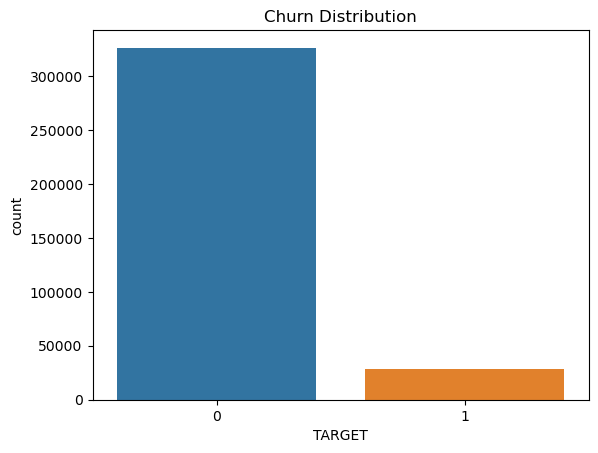

In [28]:

#Observing target valiable distributuion in our main data.
sns.countplot(x='TARGET', data=processedBankData)
plt.title('Churn Distribution')
plt.show()

In [29]:
processedBankData["TARGET"].value_counts()

0    326159
1     28923
Name: TARGET, dtype: int64

**Categorical and Numerical Features**

In [65]:
#Numerical features (numbers)
numerical_features = processedBankData.select_dtypes(include=['number'])
print(f"Number of numerical features : {numerical_features.shape[1]}")

#categorical features (object and bool types)
categorical_features = processedBankData.select_dtypes(include=['object', 'bool'])
print(f"Number of categorical features : {categorical_features.shape[1]}")

Number of numerical features : 102
Number of categorical features : 13


In [66]:
#dividing the dataset into independent variabls and target variable.
X = processedBankData.drop('TARGET', axis=1)
y = processedBankData['TARGET']

In [79]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

* Most of the categorical features got dropped. it is better to not use them than impute more null values with mode from vry few data. 
* Let us convert the remaining categorical feature into numerical feature.

In [81]:
from sklearn.preprocessing import OneHotEncoder
# Creating OneHotEncoder object with a minimum frequency threshold
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', min_frequency=100)


# Fit the encoder on the training data and transform the training data
X_train = onehot_encoder.fit_transform(X_train[['PACK']])

# Transform the test data using the fitted encoder
X_test = onehot_encoder.transform(X_test[['PACK']])


In [82]:
#Observing the target class distribution.
y.value_counts()

0    326159
1     28923
Name: TARGET, dtype: int64

**Data Plots**

In [83]:
X_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

**Scaling Numerical Features**

In [80]:
# Scaling the numerical variables data
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


In [ ]:
import numpy as np
import pickle

# Save the scaler itself
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [ ]:
# Save OneHotEncoder object
with open('onehot_encoder.pkl', 'wb') as f:
    pickle.dump(onehot_encoder, f)

# Save OneHotEncoder mapping
with open('onehot_encoder_mapping.pkl', 'wb') as f:
    pickle.dump(onehot_encoder.categories_, f)
np.save('X_train_columns.npy', X_train.columns)

In [84]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}
class_weights

{0: 0.544391100753869, 1: 6.131759423722124}

In [85]:
X_train.shape[1]

10

 **build and tune a DNN model**

In [86]:
from tensorflow.keras.layers import Dense, Dropout
from keras.regularizers import l2

def build_dnn_model(input_dim):
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim, activation='relu'))
    BatchNormalization(),
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='sigmoid'))
    BatchNormalization(),
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # For binary classification
    return model

input_dim = X_train.shape[1]
model = build_dnn_model(input_dim)

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [87]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# Train Model with Early Stopping and ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_accuracy', patience=4, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, min_lr=1e-6)

In [92]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=64, 
                    validation_split=0.2, 
                    callbacks=[early_stop, reduce_lr],
                    class_weight={0: 0.7, 1: 7},
                    verbose=1)

Epoch 1/50
3107/3107 [==============================] - 25s 8ms/step - loss: 0.8344 - accuracy: 0.5820 - val_loss: 0.6658 - val_accuracy: 0.6285 - lr: 0.0010
Epoch 2/50
3107/3107 [==============================] - 26s 8ms/step - loss: 0.8303 - accuracy: 0.7116 - val_loss: 0.6571 - val_accuracy: 0.6285 - lr: 0.0010
Epoch 3/50
3107/3107 [==============================] - 26s 8ms/step - loss: 0.8299 - accuracy: 0.7817 - val_loss: 0.6522 - val_accuracy: 0.6285 - lr: 0.0010
Epoch 4/50
3107/3107 [==============================] - 25s 8ms/step - loss: 0.8310 - accuracy: 0.7750 - val_loss: 0.6424 - val_accuracy: 0.8071 - lr: 0.0010
Epoch 5/50
3107/3107 [==============================] - 25s 8ms/step - loss: 0.8305 - accuracy: 0.7852 - val_loss: 0.6502 - val_accuracy: 0.8071 - lr: 0.0010
Epoch 6/50
3107/3107 [==============================] - 22s 7ms/step - loss: 0.8302 - accuracy: 0.7831 - val_loss: 0.6454 - val_accuracy: 0.6285 - lr: 0.0010
Epoch 7/50
3107/3107 [==============================

In [93]:
# Evaluate the model on the training data
loss, accuracy = model.evaluate(X_train, y_train, verbose=2)
print(f"Train accuracy: {accuracy}")

loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {accuracy}")


7768/7768 - 21s - loss: 0.6482 - accuracy: 0.8087 - 21s/epoch - 3ms/step
Train accuracy: 0.8087158799171448
3329/3329 - 10s - loss: 0.6481 - accuracy: 0.8090 - 10s/epoch - 3ms/step
Test accuracy: 0.8090307712554932


3329/3329 [==============================] - 11s 3ms/step - loss: 0.6481 - accuracy: 0.8090
Test Accuracy: 0.8090
3329/3329 [==============================] - 10s 3ms/step


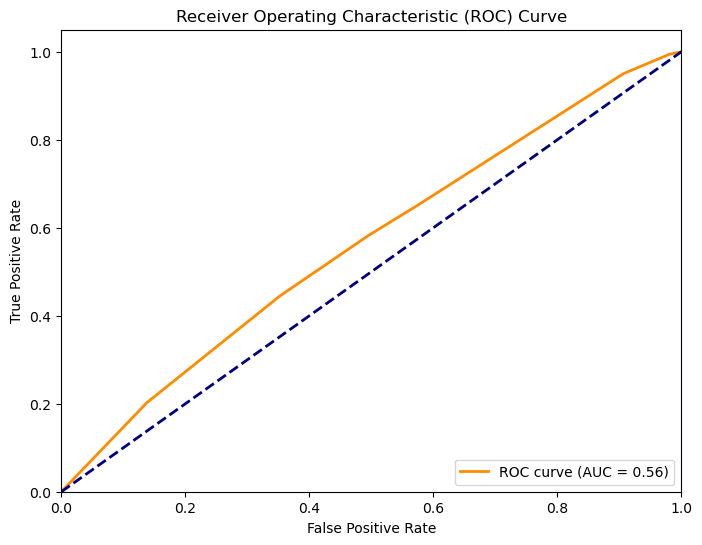

3329/3329 [==============================] - 10s 3ms/step


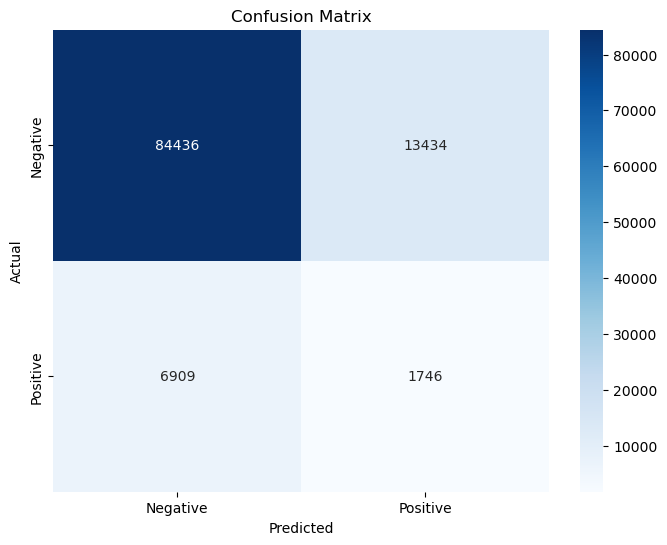

DNN Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89     97870
           1       0.12      0.20      0.15      8655

    accuracy                           0.81    106525
   macro avg       0.52      0.53      0.52    106525
weighted avg       0.86      0.81      0.83    106525



In [94]:


# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predict probabilities on the test set
y_pred_prob = model.predict(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig("roc_curve.png")  # Save ROC curve image
plt.show()

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png")  # Save confusion matrix image
plt.show()

# Print classification report
print("DNN Classification Report:")
print(classification_report(y_test, y_pred))


In [96]:
model.save("ChurnDL_80.keras")

In [177]:
cm

array([[63620, 34210],
       [ 1746,  6946]], dtype=int64)